In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


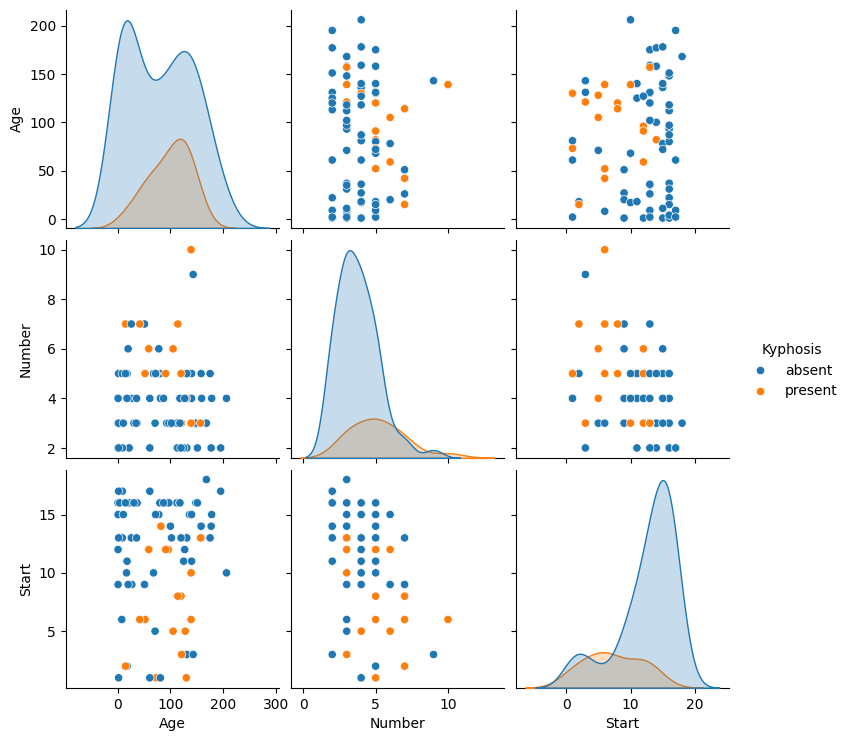

In [5]:
sns.pairplot(df, hue = 'Kyphosis')

#Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

#Training the model using Decision Trees and Random Forest

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier(criterion = 'entropy')

In [11]:
dtree1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 11)

In [12]:
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [13]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#Prediction

In [14]:
predictions = dtree.predict(X_test)

In [15]:
predictions1 = dtree1.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
confusion_matrix(y_test, predictions)

array([[16,  1],
       [ 3,  5]])

In [18]:
confusion_matrix(y_test, predictions1)

array([[16,  1],
       [ 2,  6]])

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.84      0.94      0.89        17
     present       0.83      0.62      0.71         8

    accuracy                           0.84        25
   macro avg       0.84      0.78      0.80        25
weighted avg       0.84      0.84      0.83        25



In [20]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

      absent       0.89      0.94      0.91        17
     present       0.86      0.75      0.80         8

    accuracy                           0.88        25
   macro avg       0.87      0.85      0.86        25
weighted avg       0.88      0.88      0.88        25



#DecisionTree

In [21]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

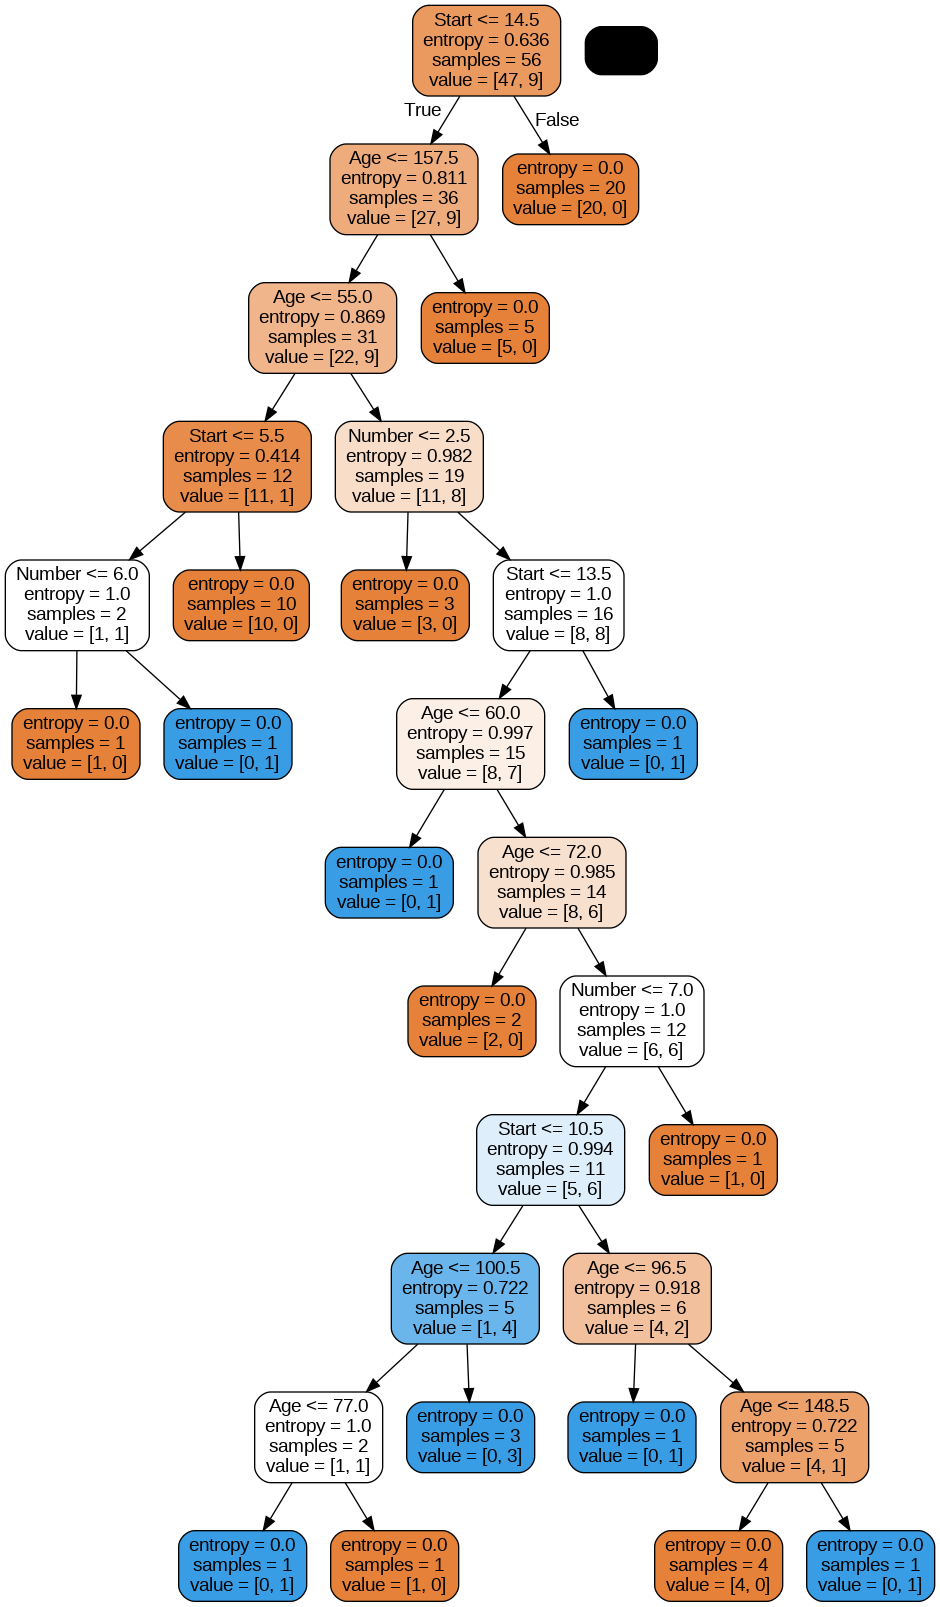

In [22]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, feature_names = features, filled = True, rounded = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())